# MASONGO UMAR
1800738510         2018/HD05/1967U
## MASTER OF SCIENCE IN COMPUTER SCIENCE
COMPUTER VISION PROJECT EXAM

In [7]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1: Local feature detection and matching using 
Scale Invariant Feature Transform (SIFT) Algorithm

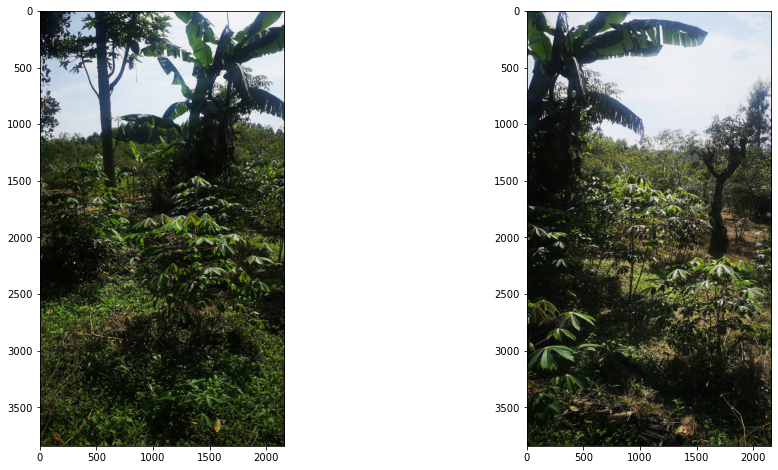

In [8]:
# Read and display the original 2 images whose features are to be detected and matched

image_1 = cv2.imread("./sift_images/frame211.jpg")
image_2 = cv2.imread("./sift_images/frame389.jpg") 

colored_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
colored_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(colored_image_1)
ax[1].imshow(colored_image_2)


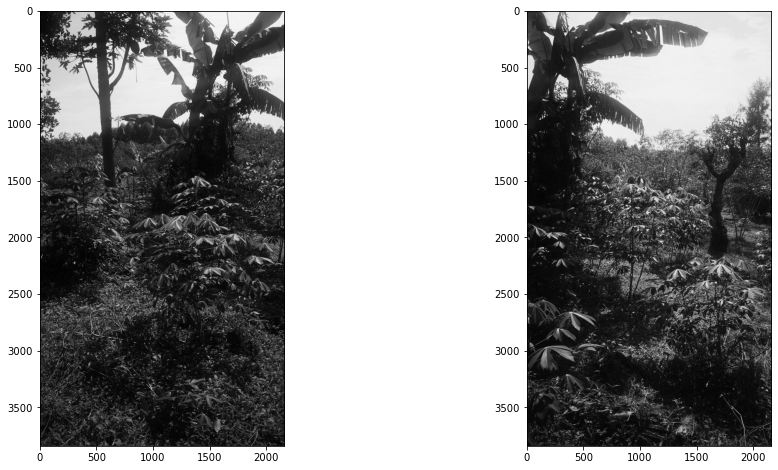

In [10]:
# Image cleaning and removing unnecessary features
gray_image_1 = cv2.cvtColor(colored_image_1, cv2.COLOR_BGR2GRAY)
gray_image_2 = cv2.cvtColor(colored_image_2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(gray_image_1, cmap='gray')
ax[1].imshow(gray_image_2, cmap='gray')

In [11]:
# Initiating the SIFT detector
sift = cv2.SIFT_create()

# Detecting local feature keypoints and descriptors,  
image1_keypoints, image1_descriptors = sift.detectAndCompute(gray_image_1, None)
image2_keypoints, image2_descriptors = sift.detectAndCompute(gray_image_2, None)

# Getting the number of Keypoints in the first and second image respectively
len(image1_keypoints), len(image2_keypoints)

(109480, 108483)

Matching the SIFT keypoints and descriptors using Brute-Force Matcher

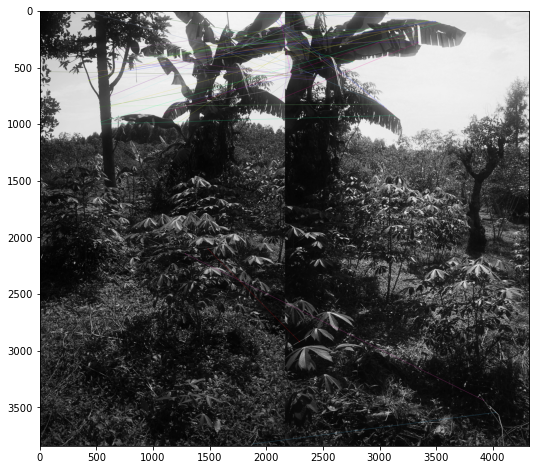

In [12]:
# Creating BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Matching the local descriptors
matches = bf.match(image1_descriptors, image2_descriptors)

# Sorting the matched descriptors in order of their distances
matches = sorted(matches, key = lambda x:x.distance)

image_1_2_matched = cv2.drawMatches(gray_image_1, image1_keypoints, gray_image_2, image2_keypoints, matches[:50], gray_image_2, flags=2)

# Visualising the matched keypoints
plt.figure(figsize=(16, 8))
plt.imshow(image_1_2_matched)
plt.show()

Matching the SIFT keypoints and descriptors using FLAN Based Matcher

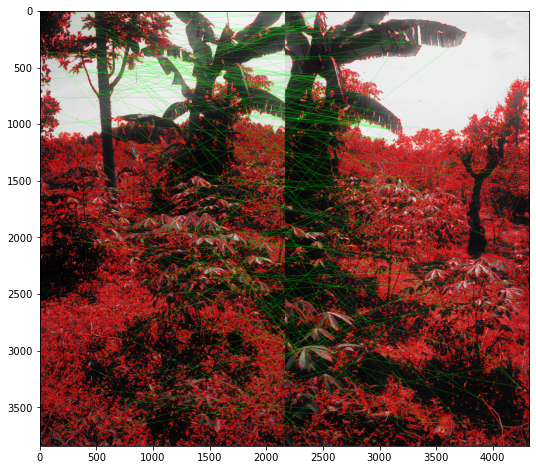

In [13]:
# Declare the FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

# Creating the FLANN matcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Matching the local descriptors
matches = flann.knnMatch(image1_descriptors, image2_descriptors, k=2)

# A mask to enable drawing of only good matches
matchesMask = [[0,0] for i in range(len(matches))]

# Ratio test as defined in Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

image_1_2_matched = cv2.drawMatchesKnn(gray_image_1, image1_keypoints, gray_image_2, image2_keypoints, matches, None, **draw_params)

# Visualising the matched keypoints
plt.figure(figsize=(16,8))
plt.imshow(image_1_2_matched)
plt.show()